# Introduction to Chainladder AI Agent

This notebook introduces the Chainladder AI Agent system, which combines the power of the `chainladder-python` package with AI capabilities through `langgraph-supervisor`.

## What is Chainladder AI Agent?

The Chainladder AI Agent is a specialized AI system that helps actuaries and insurance professionals work with triangle data and perform actuarial analyses. It consists of several specialized agents:

- **Data Agent**: Handles triangle data loading, validation, and exploration
- **Analysis Agent**: Performs actuarial analyses like Chain Ladder, Mack, Bornhuetter-Ferguson
- **Visualization Agent**: Creates data visualizations of triangles and results
- **Explanation Agent**: Provides explanations and reports on actuarial concepts
- **Supervisor Agent**: Coordinates all the specialized agents

## Prerequisites

To use these notebooks, you need:
1. Python 3.8+ environment with required dependencies installed
2. An OpenAI API key

## Setup

First, let's set up our environment and import necessary modules:

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chainladder as cl

# Add the project root to the path so we can import our package
sys.path.append('..')

# Import the supervisor agent creator
from chainladder_agent.agents.supervisor import create_chainladder_supervisor

## Setting up your API Key

The AI components of the Chainladder Agent use the OpenAI API. You need to provide your API key to use these features. You can set it as an environment variable or provide it directly in this notebook.

In [4]:
# Option 1: Set API key from environment variable
api_key = os.environ.get("OPENAI_API_KEY")

# Option 2: Set API key directly (not recommended for shared notebooks)
# api_key = "your-api-key-here"

if not api_key:
    print("Warning: No OpenAI API key found. Please set your API key.")
else:
    print("API key is set.")

API key is set.


## Creating the Chainladder AI Supervisor

The Supervisor is the main entry point to interact with the Chainladder AI Agent system. It coordinates all the specialized agents to process your requests.

In [6]:
# Create the supervisor
supervisor = create_chainladder_supervisor(api_key=api_key)
print("Supervisor created successfully.")

Supervisor created successfully.


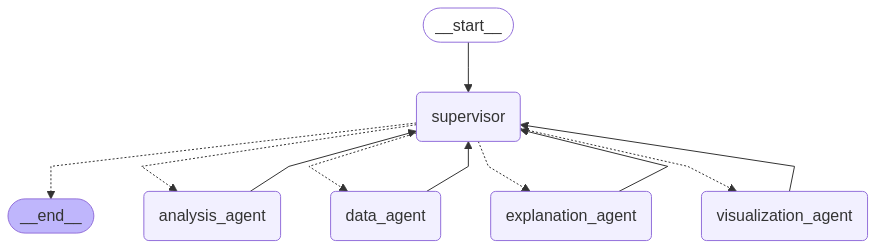

In [7]:
# multi-agent structure
from IPython.display import Image, display

display(Image(supervisor.get_graph().draw_mermaid_png()))

## Your First Interaction with the Agent

Let's try a simple query to get information about the available triangle datasets:

In [10]:
query = "What triangle datasets are available in the chainladder package?"

# Prepare the input
input_data = {
    "messages": [{"role": "user", "content": query}],
    "selected_triangle": "" # No specific triangle selected for this query
}

# Run the query
result = supervisor.invoke(input_data)

In [11]:
# Extract and display the AI response
for message in result.get("messages", []):
    if hasattr(message, 'type') and message.type == 'ai':
        # Found an AI message
        print(f"AI Response:\n\n{message.content}\n")

AI Response:



AI Response:



AI Response:

The chainladder package provides several sample triangle datasets that you can use for actuarial analysis. Here are the available triangle datasets:

1. raa
2. abc
3. genins
4. ukmotor
5. quarterly
6. auto
7. clrd
8. berquist
9. mortgage
10. usauto
11. uspp
12. mcl

If you want details about any specific triangle (such as its structure, format, or a preview of the data), just let me know which one you're interested in!

AI Response:

Transferring back to supervisor

AI Response:

The following triangle datasets are available in the chainladder package:

1. raa
2. abc
3. genins
4. ukmotor
5. quarterly
6. auto
7. clrd
8. berquist
9. mortgage
10. usauto
11. uspp
12. mcl

Let me know if you’d like to explore or analyze any of these datasets further!



## Exploring the RAA Triangle

Now, let's ask about the RAA triangle, which is one of the most commonly used examples in actuarial science:

In [12]:
query = "Tell me about the RAA triangle dataset. What does it contain?"

# Prepare the input
input_data = {
    "messages": [{"role": "user", "content": query}],
    "selected_triangle": "raa" 
}

# Run the query
result = supervisor.invoke(input_data)

# Extract and display the AI response
for message in result.get("messages", []):
    if hasattr(message, 'type') and message.type == 'ai':
        # Found an AI message
        print(f"AI Response:\n\n{message.content}\n")

AI Response:



AI Response:



AI Response:

The RAA triangle is a classic sample dataset included in the chainladder package, widely used for actuarial analysis and demonstration of loss development techniques. Here’s what it contains and how it is structured:

Key Features of the RAA Triangle

- Dimensions: 10 origin periods (years) × 10 development periods (years)
- Origin Periods: 1981 to 1990 (each representing an accident year)
- Development Periods: 12, 24, ..., 120 months (1 to 10 years of development)
- Columns: Single column, typically "values" (representing cumulative paid losses)
- Format: Cumulative (each cell shows the total value reported up to that development period)
- Grain: Yearly (both origin and development are in years)
- Data Type: Paid loss triangle (commonly used for chain ladder analysis)
- Validity: The triangle is valid for analysis (no missing values in the main diagonal, correct structure, cumulative format)

Example Data Preview

Here’s a sample of the t

## Helper Function for Easier Interaction

Let's create a simple helper function to make our interaction with the agent easier:

In [ ]:
def ask_agent(query, triangle_name=""):
    """Helper function to interact with the Chainladder AI Agent.
    
    Parameters:
        query (str): The question or instruction for the agent
        triangle_name (str): Optional name of the triangle dataset to use
        
    Returns:
        str: The agent's response
    """
    # Prepare the input
    input_data = {
        "messages": [{"role": "user", "content": query}],
        "selected_triangle": triangle_name
    }
    
    # Run the query
    result = supervisor.invoke(input_data)
    
    # Find the AI response
    ai_messages = []
    
    for message in result.get("messages", []):
        if hasattr(message, 'type') and message.type == 'ai':
            # Add this message to our collection
            if message.content and len(message.content) > 20:
                ai_messages.append((len(message.content), message.content))
    
    # Sort by content length and get the longest (likely most informative) response
    if ai_messages:
        ai_messages.sort(reverse=True)
        return ai_messages[0][1]
    else:
        return "No response received."

# Test our helper function
response = ask_agent("What is IBNR in actuarial science?")
print(response)

## Conclusion

In this introductory notebook, we:
1. Set up the Chainladder AI Agent
2. Made our first queries to the agent
3. Created a helper function for easier interaction

In the following notebooks, we'll explore more advanced features of the Chainladder AI Agent, including:
- Working with different triangle datasets
- Performing actuarial analyses
- Creating visualizations
- Getting explanations of actuarial concepts